## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
%cd ../src/
import get_stats
%cd ../notebooks/

/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/src
/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/notebooks


## Get data

For this project, we'd like to work with a [Consumer Sentiment](https://www.quandl.com/data/UMICH/SOC1-University-of-Michigan-Consumer-Survey-Index-of-Consumer-Sentiment) dataset.

In [3]:
%cd ../data/
cons_sent = pd.read_pickle("cons_sent.pickle")
%cd ../notebooks/

/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/data
/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/notebooks


## Explore data

In [4]:
cons_sent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 593 entries, 1952-11-30 to 2019-09-30
Data columns (total 1 columns):
Index    593 non-null float64
dtypes: float64(1)
memory usage: 9.3 KB


In [5]:
cons_sent.describe()

,Index
count,593.000000
mean,86.611130
std,12.330911
min,51.700000
25%,77.600000
50%,90.200000
75%,95.300000
max,112.000000


In [6]:
cons_sent.head()

,Index
Date,
1952-11-30,86.2
1953-02-28,90.7
1953-08-31,80.8
1953-11-30,80.7
1954-02-28,82.0


In [7]:
cons_sent.tail()

,Index
Date,
2019-05-31,100.0
2019-06-30,98.2
2019-07-31,98.4
2019-08-31,89.8
2019-09-30,93.2


In [8]:
cons_sent.groupby(pd.Grouper(freq="A")).count()

,Index
Date,
1952-12-31,1
1953-12-31,3
1954-12-31,3
1955-12-31,3
1956-12-31,3
1957-12-31,2
1958-12-31,3
1959-12-31,2
1960-12-31,4


In [9]:
(cons_sent.groupby(pd.Grouper(freq="A")).count() != 12).sum()

Index    27
dtype: int64

The first 26 years (1952 to 1977) don't have monthly frequency.<br>
Also, we only have data for the first 9 months of 2019 (note: this dataset was retrieved on Nov 2, 2019).

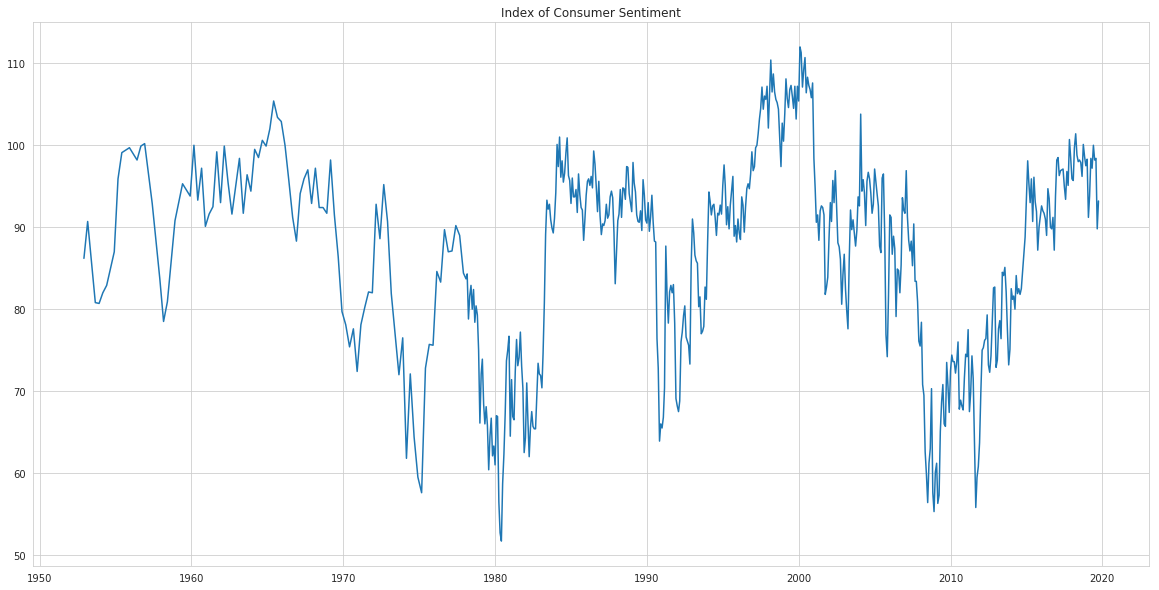

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(cons_sent)
plt.title("Index of Consumer Sentiment")
plt.show()

## Datasets to use

### As is

cons_sent

### Upsampling

It only makes sense to do upsampling in our case.<br>
Here, we apply forward filling.

In [11]:
cons_sent_up = cons_sent.resample("M").ffill()

In [12]:
cons_sent_up.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 1952-11-30 to 2019-09-30
Freq: M
Data columns (total 1 columns):
Index    803 non-null float64
dtypes: float64(1)
memory usage: 12.5 KB


In [13]:
cons_sent_up.head()

,Index
Date,
1952-11-30,86.2
1952-12-31,86.2
1953-01-31,86.2
1953-02-28,90.7
1953-03-31,90.7


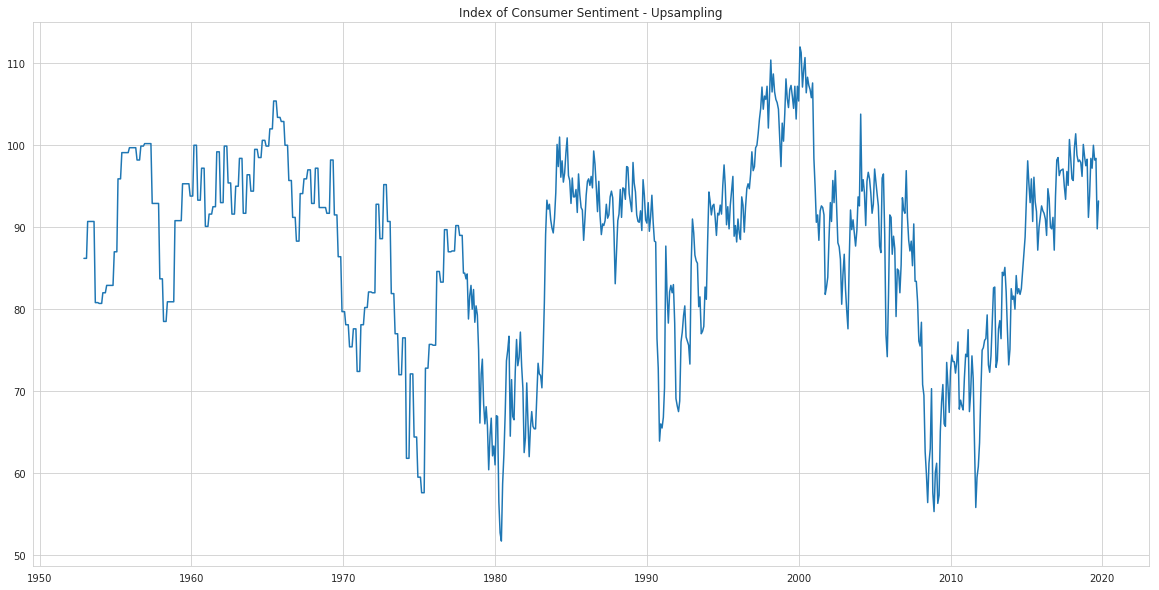

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(cons_sent_up)
plt.title("Index of Consumer Sentiment - Upsampling")
plt.show()

### Real monthly

We only keep the years with "real" monthly frequency (1978 onwards).

In [15]:
cons_sent_monthly = cons_sent["1978":]

In [16]:
cons_sent_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 1978-01-31 to 2019-09-30
Data columns (total 1 columns):
Index    501 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


In [17]:
cons_sent_monthly.head()

,Index
Date,
1978-01-31,83.7
1978-02-28,84.3
1978-03-31,78.8
1978-04-30,81.6
1978-05-31,82.9


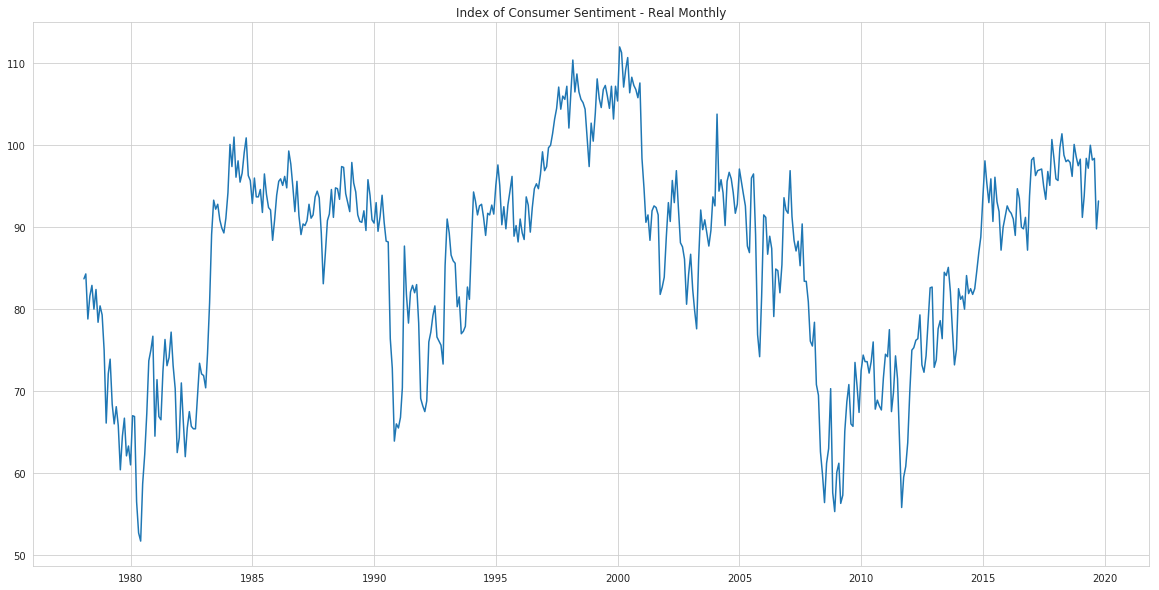

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(cons_sent_monthly)
plt.title("Index of Consumer Sentiment - Real Monthly")
plt.show()

## Is stationary?

### As is

In [19]:
get_stats.Stats.adfuller(cons_sent)

ADF Statistic: -2.990084
p-value:       0.035831
	1%: -3.442
	5%: -2.866
	10%: -2.569


Our statistic value of -2.990084 is less than the value of -2.866 at 5%.<br>
We can reject the null hypothesis at 5% significance.<br>
Rejecting the null hypothesis means that the process has no unit root (the time series is stationary or does not have time-dependent structure).

### Upsampling

In [20]:
get_stats.Stats.adfuller(cons_sent_up)

ADF Statistic: -3.833638
p-value:       0.002581
	1%: -3.439
	5%: -2.865
	10%: -2.569


Our statistic value of -3.833638 is less than the value of -3.439 at 1%.<br>
We can reject the null hypothesis at 1% significance.<br>
Rejecting the null hypothesis means that the process has no unit root (the time series is stationary or does not have time-dependent structure).

### Real monthly

In [21]:
get_stats.Stats.adfuller(cons_sent_monthly)

ADF Statistic: -2.377887
p-value:       0.148075
	1%: -3.444
	5%: -2.867
	10%: -2.570


Our statistic value of -2.377887 is greater than all of the values presented.<br>
We fail to reject the null hypothesis.<br>
Failing to reject the null hypothesis means that the time series is non-stationary and does have time-dependent structure.